In [29]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import csv

In [211]:
unifilename = './data_main.csv'
with open(unifilename, 'rU') as f:  #opens PW file
    unidataLi = list(list(rec) for rec in csv.reader(f, delimiter=','))

/Users/yangminglin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 'U' mode is deprecated
  from ipykernel import kernelapp as app


In [214]:
data = unidataLi[1:]

In [216]:
data[10]

['7394510',
 'E12000001',
 'H',
 '1',
 '1',
 '1',
 '3',
 '1',
 '2',
 '1',
 '3',
 '1',
 '8',
 '1',
 '8',
 '2',
 '3',
 '4']

In [215]:
len(data)

569741

In [2]:
df = pd.read_csv('data_main.csv')
df.describe()

,Person ID,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
count,5.697410e+05,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000,569741.000000
mean,7.679353e+06,2.011870,1.018731,1.507550,3.978680,1.856201,1.777904,1.016239,1.658324,1.191250,2.419387,0.685597,1.240994,2.459844,-3.487095,0.034130
std,1.644702e+05,2.358788,0.159058,0.499943,2.219494,1.125020,0.415655,1.153095,1.486598,1.391858,2.493064,5.265465,6.521825,7.398945,5.887539,4.862672
min,7.394483e+06,-9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,7.536918e+06,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000,-9.000000,-9.000000,1.000000
50%,7.679353e+06,2.000000,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,4.000000,-9.000000,2.000000
75%,7.821788e+06,3.000000,1.000000,2.000000,6.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,5.000000,6.000000,8.000000,3.000000,3.000000
max,7.964223e+06,6.000000,3.000000,2.000000,8.000000,5.000000,2.000000,2.000000,5.000000,5.000000,9.000000,9.000000,9.000000,12.000000,4.000000,4.000000


# 失業率

In [20]:
i = 1
j = 1
k = 1
l = 3

economic = df.loc[(df['Industry'] == i) & (df['Ethnic Group'] == j) & (df['Sex'] == k) & (df['Marital Status'] == l) & (df['Economic Activity'] > 0) & (df['Economic Activity'] > 0) & (df['Economic Activity'] < 4), 'Economic Activity']

In [24]:
len(economic)

25

In [3]:
economic_list = list()
for i in range(1, 13):
    for j in range(1, 6):
        for k in range(1, 3):
            for l in range(1, 6):
                economic = df.loc[(df['Industry'] == i) & (df['Ethnic Group'] == j) & (df['Sex'] == k) & (df['Marital Status'] == l) & (df['Economic Activity'] > 0) & (df['Economic Activity'] > 0) & (df['Economic Activity'] < 4), 'Economic Activity']
                economic_list.append([(i, j ,k, l), economic])
                

In [12]:
economic_list

[[(1, 1, 1, 1), 762       1
  860       1
  1431      1
  4935      1
  8023      2
  9875      1
  12256     2
  14095     1
  15390     1
  16172     1
  16561     3
  16641     2
  16920     2
  18201     1
  19204     1
  20043     1
  20243     1
  24553     1
  29933     1
  29950     2
  30194     2
  30209     2
  30264     1
  30543     1
  30961     1
  31035     2
  32198     3
  32681     1
  33811     1
  34028     2
           ..
  540355    2
  540392    2
  541712    1
  546856    2
  546870    1
  548824    2
  549103    1
  549382    1
  550164    1
  550504    2
  551244    1
  552367    2
  553300    2
  553410    2
  555426    2
  555582    2
  555802    2
  556499    2
  556508    2
  557684    1
  558211    1
  559767    2
  559769    2
  559780    2
  561352    2
  561379    1
  562119    1
  564298    1
  564303    1
  565384    1
  Name: Economic Activity, dtype: int64], [(1, 1, 1, 2), 643       2
  2825      2
  6807      2
  8218      2
  8244      2
  12795

In [149]:
data_losejob = []
for row in economic_list:
    unemploy = 0
    unemploy_rate = 0.0
    if (len(row[1]) == 0) :
        continue
    for i in row[1]:
        if i == 3:
            unemploy += 1
    try:
        unemploy_rate = unemploy / len(row[1])        
    except:
        pass
    
    data = []
    data.append(row[0])
    data.append(unemploy_rate)
    data.append(len(row[1]))
    data_losejob.append(data)

In [150]:
len(data_losejob)

554

In [153]:
data_losejob_30 = []
for item in data_losejob :
    if item[2] < 30 :
        continue
    data_losejob_30.append(item)

In [154]:
len(data_losejob_30)

296

In [155]:
data_losejob_30 = sorted(data_losejob_30, key = lambda x : x[1],reverse= True)

In [156]:
data_losejob_30

[[(2, 4, 1, 1), 0.3431372549019608, 102],
 [(8, 4, 2, 3), 0.34, 50],
 [(5, 4, 1, 1), 0.26785714285714285, 112],
 [(4, 4, 1, 3), 0.26666666666666666, 30],
 [(3, 4, 1, 1), 0.25203252032520324, 123],
 [(5, 2, 2, 1), 0.24358974358974358, 78],
 [(12, 4, 1, 1), 0.23809523809523808, 105],
 [(8, 4, 2, 4), 0.23728813559322035, 59],
 [(5, 4, 2, 1), 0.22448979591836735, 98],
 [(4, 4, 1, 4), 0.21052631578947367, 38],
 [(3, 5, 1, 1), 0.2, 30],
 [(4, 4, 2, 1), 0.2, 215],
 [(8, 3, 1, 4), 0.2, 35],
 [(12, 2, 1, 1), 0.2, 85],
 [(2, 5, 1, 1), 0.19444444444444445, 36],
 [(3, 2, 1, 1), 0.1893939393939394, 132],
 [(2, 2, 1, 1), 0.18584070796460178, 113],
 [(8, 2, 1, 1), 0.18181818181818182, 187],
 [(8, 4, 1, 1), 0.18088737201365188, 293],
 [(4, 2, 1, 1), 0.17857142857142858, 224],
 [(4, 5, 1, 1), 0.17721518987341772, 79],
 [(4, 4, 1, 1), 0.17582417582417584, 273],
 [(6, 4, 1, 3), 0.17391304347826086, 46],
 [(5, 2, 1, 1), 0.1651376146788991, 109],
 [(6, 2, 2, 1), 0.16363636363636364, 55],
 [(9, 4, 1, 1), 0.

In [113]:
len(datas)

554

In [157]:
writename = "JobLose_30_sort.csv"

In [158]:
writename = "JobLose_30_sort.csv"

with open(writename, "w") as f:
    writer = csv.writer(f)
    for word in data_losejob_30:
        writer.writerow(word)

In [51]:
len(datas)

547

# 工時

In [45]:
hour_list = list()
for i in range(1, 13):
    for j in range(1, 6):
        for k in range(1, 3):
            for l in range(1, 6):
                hour = df.loc[(df['Industry'] == i) & (df['Ethnic Group'] == j) & (df['Sex'] == k) & (df['Marital Status'] == l) & (df['Economic Activity'] > 0) & (df['Economic Activity'] > 0) & (df['Economic Activity'] < 4) & (df['Hours worked per week'] > 0), 'Hours worked per week']
                hour_list.append([(i, j ,k, l), hour])


In [58]:
hour_list[1][0]

(1, 1, 1, 2)

In [159]:
data_joblength = []
for row in hour_list:
    hour_total = 0
    hour_everage = 0.0
    if (len(row[1]) == 0) :
        continue
    for i in row[1]:
        hour_total += i
        try:            
            hour_everage = hour_total / len(row[1])    
        except:
            pass
    print(row[0], hour_everage) 
    
    data = []
    data.append(row[0])
    data.append(hour_everage)
    data.append(len(row[1]))
    data_joblength.append(data)


(1, 1, 1, 1) 3.37057728119
(1, 1, 1, 2) 3.4084934277
(1, 1, 1, 3) 3.24
(1, 1, 1, 4) 3.32
(1, 1, 1, 5) 3.21428571429
(1, 1, 2, 1) 2.98507462687
(1, 1, 2, 2) 2.5057208238
(1, 1, 2, 3) 2.72727272727
(1, 1, 2, 4) 2.6
(1, 1, 2, 5) 2.27777777778
(1, 2, 1, 1) 3.33333333333
(1, 2, 1, 2) 3.66666666667
(1, 2, 2, 2) 4.0
(1, 3, 1, 2) 3.0
(1, 3, 1, 3) 2.0
(1, 3, 2, 1) 3.0
(1, 3, 2, 2) 3.0
(1, 3, 2, 5) 3.0
(1, 4, 1, 1) 3.0
(1, 4, 1, 2) 3.0
(1, 4, 1, 4) 3.0
(1, 4, 2, 1) 3.0
(1, 5, 1, 1) 3.0
(2, 1, 1, 1) 3.05780346821
(2, 1, 1, 2) 3.10706860707
(2, 1, 1, 3) 3.08159392789
(2, 1, 1, 4) 3.08683473389
(2, 1, 1, 5) 2.9387755102
(2, 1, 2, 1) 2.88905775076
(2, 1, 2, 2) 2.6055408971
(2, 1, 2, 3) 2.78571428571
(2, 1, 2, 4) 2.7760989011
(2, 1, 2, 5) 2.5
(2, 2, 1, 1) 2.95652173913
(2, 2, 1, 2) 3.04615384615
(2, 2, 1, 3) 3.0
(2, 2, 1, 4) 3.0
(2, 2, 1, 5) 3.0
(2, 2, 2, 1) 2.97619047619
(2, 2, 2, 2) 2.90476190476
(2, 2, 2, 3) 2.8
(2, 2, 2, 4) 3.0
(2, 3, 1, 1) 2.91612903226
(2, 3, 1, 2) 2.88920454545
(2, 3, 1, 3) 2.

In [160]:
len(data_joblength)

547

In [75]:
for row in hour_list:
    hour_total = 0
    hour_everage = 0.0
    for i in row[1]:
        hour_total += i
        try:            
            hour_everage = hour_total / len(row[1])    
        except:
            pass
    print(row[0], hour_everage)    


(1, 1, 1, 1) 3.37057728119
(1, 1, 1, 2) 3.4084934277
(1, 1, 1, 3) 3.24
(1, 1, 1, 4) 3.32
(1, 1, 1, 5) 3.21428571429
(1, 1, 2, 1) 2.98507462687
(1, 1, 2, 2) 2.5057208238
(1, 1, 2, 3) 2.72727272727
(1, 1, 2, 4) 2.6
(1, 1, 2, 5) 2.27777777778
(1, 2, 1, 1) 3.33333333333
(1, 2, 1, 2) 3.66666666667
(1, 2, 1, 3) 0.0
(1, 2, 1, 4) 0.0
(1, 2, 1, 5) 0.0
(1, 2, 2, 1) 0.0
(1, 2, 2, 2) 4.0
(1, 2, 2, 3) 0.0
(1, 2, 2, 4) 0.0
(1, 2, 2, 5) 0.0
(1, 3, 1, 1) 0.0
(1, 3, 1, 2) 3.0
(1, 3, 1, 3) 2.0
(1, 3, 1, 4) 0.0
(1, 3, 1, 5) 0.0
(1, 3, 2, 1) 3.0
(1, 3, 2, 2) 3.0
(1, 3, 2, 3) 0.0
(1, 3, 2, 4) 0.0
(1, 3, 2, 5) 3.0
(1, 4, 1, 1) 3.0
(1, 4, 1, 2) 3.0
(1, 4, 1, 3) 0.0
(1, 4, 1, 4) 3.0
(1, 4, 1, 5) 0.0
(1, 4, 2, 1) 3.0
(1, 4, 2, 2) 0.0
(1, 4, 2, 3) 0.0
(1, 4, 2, 4) 0.0
(1, 4, 2, 5) 0.0
(1, 5, 1, 1) 3.0
(1, 5, 1, 2) 0.0
(1, 5, 1, 3) 0.0
(1, 5, 1, 4) 0.0
(1, 5, 1, 5) 0.0
(1, 5, 2, 1) 0.0
(1, 5, 2, 2) 0.0
(1, 5, 2, 3) 0.0
(1, 5, 2, 4) 0.0
(1, 5, 2, 5) 0.0
(2, 1, 1, 1) 3.05780346821
(2, 1, 1, 2) 3.10706860707
(2, 1,

In [87]:
len(datas)

547

In [161]:
data_joblength_30 = []
for item in data_joblength :
    if item[2] < 30 :
        continue
    data_joblength_30.append(item)

In [162]:
len(data_joblength_30)

286

In [163]:
data_joblength_30 = sorted(data_joblength_30, key = lambda x : x[1],reverse= True)

In [164]:
writename = "JobLength_30_sort.csv"

with open(writename, "w") as f:
    writer = csv.writer(f)
    for word in data_joblength_30:
        writer.writerow(word)

# 社會階級（相關係數、斜率）

In [209]:
age_list = list()
ages = []
for i in range(1, 13):
    for j in range(1, 6):
        for k in range(1, 3):
            for l in range(1, 6):
                age = df.loc[(df['Industry'] == i) & (df['Ethnic Group'] == j) & (df['Sex'] == k) & (df['Marital Status'] == l) & (df['Economic Activity'] > 0) & (df['Economic Activity'] > 0) & (df['Economic Activity'] < 4) & (df['Approximated Social Grade'] > 0), 'Age']
                age_list.append([(i, j ,k, l), age])     
                ages.append(age)

90242     7
121587    5
192438    3
Name: Age, dtype: int64

In [132]:
len(age_list)

600

In [134]:
social_list = list()
for i in range(1, 13):
    for j in range(1, 6):
        for k in range(1, 3):
            for l in range(1, 6):
                social = df.loc[(df['Industry'] == i) & (df['Ethnic Group'] == j) & (df['Sex'] == k) & (df['Marital Status'] == l) & (df['Economic Activity'] > 0) & (df['Economic Activity'] > 0) & (df['Economic Activity'] < 4) & (df['Approximated Social Grade'] > 0), 'Approximated Social Grade']
                social_list.append([(i, j ,k, l), social])  

In [175]:
data_social = []

age_list_30 = []

social_list_30 = []

for age, social in zip (age_list, social_list):
    if (len(age[1]) < 30) :
        continue
    
    age_list_30.append(age)
    social_list_30.append(social)
    
    age_array = np.asarray(age[1])
    age_df = pd.DataFrame(age_array)
    social_array = np.asarray(social[1])
    social_df = pd.DataFrame(social_array)
    corr = age_df[0].corr(social_df[0]) 
    if len(age_array) > 0 and len(social_array):        
        age_array = age_array.reshape((len(age_array), 1))
        social_array = social_array.reshape((len(social_array), 1))
        lg = lm.LinearRegression()
        lg.fit(age_array, social_array)
        coef = lg.coef_
        print(age[0], corr, coef)
    data = []
    data.append(age[0])
    data.append(corr)
    data.append(coef)
    data.append(len(age[1]))
    data_social.append(data)

(1, 1, 1, 1) -0.103293929394 [[-0.05324541]]
(1, 1, 1, 2) -0.0297407394377 [[-0.01659819]]
(1, 1, 1, 4) 0.0279059653909 [[ 0.0185584]]
(1, 1, 1, 5) -0.222026517893 [[-0.125]]
(1, 1, 2, 1) 0.0318371324169 [[ 0.0216574]]
(1, 1, 2, 2) 0.0540926518925 [[ 0.03427868]]
(1, 1, 2, 4) -0.12880380354 [[-0.1106028]]
(1, 1, 2, 5) 0.100528237875 [[ 0.05543823]]
(2, 1, 1, 1) -0.0269171016929 [[-0.0241795]]
(2, 1, 1, 2) 0.0177080509103 [[ 0.01733017]]
(2, 1, 1, 3) -0.0664787750086 [[-0.07043767]]
(2, 1, 1, 4) 0.0237392291046 [[ 0.02614738]]
(2, 1, 1, 5) -0.0560507711857 [[-0.05140969]]
(2, 1, 2, 1) -0.0112755303975 [[-0.01119624]]
(2, 1, 2, 2) 0.116005409344 [[ 0.10850043]]
(2, 1, 2, 3) -0.025043699751 [[-0.02879526]]
(2, 1, 2, 4) 0.0790343134662 [[ 0.08592529]]
(2, 1, 2, 5) -0.168358129022 [[-0.13483402]]
(2, 2, 1, 1) 0.0305916827449 [[ 0.0320478]]
(2, 2, 1, 2) 0.0232645143953 [[ 0.02752294]]
(2, 2, 2, 1) -0.18648300907 [[-0.26987061]]
(2, 3, 1, 1) 0.0252483570967 [[ 0.03780996]]
(2, 3, 1, 2) 0.0564

In [210]:
data_social

[[(1, 1, 1, 1), -0.10329392939422932, array([[-0.05324541]]), 558],
 [(1, 1, 1, 2), -0.02974073943770221, array([[-0.01659819]]), 1005],
 [(1, 1, 1, 4), 0.02790596539091007, array([[ 0.0185584]]), 154],
 [(1, 1, 1, 5), -0.22202651789344291, array([[-0.125]]), 32],
 [(1, 1, 2, 1), 0.031837132416927073, array([[ 0.0216574]]), 139],
 [(1, 1, 2, 2), 0.054092651892529341, array([[ 0.03427868]]), 441],
 [(1, 1, 2, 4), -0.12880380353950435, array([[-0.1106028]]), 53],
 [(1, 1, 2, 5), 0.10052823787547693, array([[ 0.05543823]]), 37],
 [(2, 1, 1, 1), -0.026917101692857312, array([[-0.0241795]]), 6904],
 [(2, 1, 1, 2), 0.017708050910285867, array([[ 0.01733017]]), 10855],
 [(2, 1, 1, 3), -0.066478775008615015, array([[-0.07043767]]), 561],
 [(2, 1, 1, 4), 0.023739229104647694, array([[ 0.02614738]]), 1935],
 [(2, 1, 1, 5), -0.05605077118569441, array([[-0.05140969]]), 209],
 [(2, 1, 2, 1), -0.011275530397464833, array([[-0.01119624]]), 2135],
 [(2, 1, 2, 2), 0.11600540934409925, array([[ 0.10850

In [199]:
data_social_sort_slope =  sorted(data_social, key = lambda x : x[2],reverse= False)

In [200]:
writename = "social_slope_30_sort.csv"

with open(writename, "w") as f:
    writer = csv.writer(f)
    for word in data_social_sort_slope:
        writer.writerow(word)

In [174]:
len(data_social)

295

In [207]:
age_list_30[10][1]

660       4
759       5
2945      4
3138      4
3244      3
3374      5
4588      6
5129      4
6395      4
6539      3
7744      5
7962      4
7977      5
8528      3
8787      3
9138      6
9175      5
9562      5
10204     4
10888     5
12967     5
13968     4
14025     5
14529     5
16130     4
16176     6
19189     3
20493     4
20681     5
21248     5
         ..
528120    3
532119    6
533213    5
533368    6
533823    5
534309    3
534365    5
536128    6
537907    5
541342    2
541558    4
542213    4
542305    5
543580    4
544827    5
545016    4
545411    4
546090    4
546488    5
547089    3
548840    4
549137    5
549284    3
550978    6
552154    4
552560    4
553182    4
553194    4
555018    5
557352    4
Name: Age, dtype: int64

In [144]:
age_df[0]

0    7
1    7
Name: 0, dtype: int64

In [66]:
age_array

array([7, 7])

In [67]:
age[1]

466562    7
514549    7
Name: Age, dtype: int64

In [98]:
social[1]

466562    3
514549    4
Name: Approximated Social Grade, dtype: int64

In [71]:
age

[(12, 5, 2, 5), 466562    7
 514549    7
 Name: Age, dtype: int64]

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt

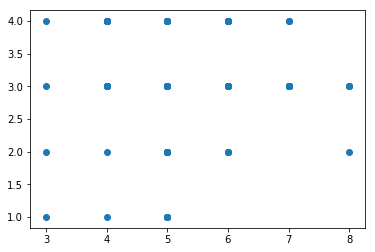

In [136]:
plt.scatter(age_list[3][1] , social_list[3][1])

In [137]:
from ipywidgets import interact, interact_manual

In [176]:
def f(x):
    plt.scatter(age_list_30[x][1] , social_list_30[x][1])

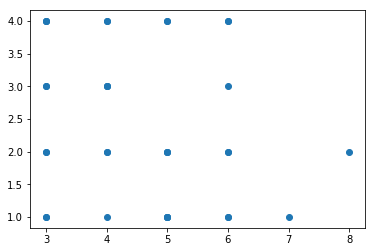

In [177]:
interact(f, x=(0, len(age_list_30)))

In [219]:
social_list[1][1]

643       2
2825      3
6807      3
8218      4
8244      3
12795     4
12998     4
13302     1
13319     3
14072     1
14097     1
14426     3
14671     2
15094     1
15126     3
15702     4
15804     2
16055     4
16882     2
17184     3
17525     2
17840     4
17847     2
17963     4
18281     3
18311     4
18631     2
18698     3
19237     3
19280     3
         ..
546861    3
548572    4
549028    4
549150    3
549151    3
550058    3
550527    3
551231    3
551257    3
551477    4
552322    4
553407    3
553428    3
553429    3
553437    3
554337    3
554477    4
555963    2
556516    2
557689    3
557726    3
559763    4
559819    3
560550    3
560592    3
562102    3
563583    3
564309    3
564973    4
565010    3
Name: Approximated Social Grade, dtype: int64